# Angular Distance Histograms

In [ ]:
from torch import nn
import torch.nn.functional as F

from adv_ml.all import *

from facial_misrecognition_systems.weight_surgery import *
from facial_misrecognition_systems.class_backdoors import *

In [ ]:
lfw = LFWPairs().dev()
pfr = PinterestFaces()

Transform to angular distance:

In [ ]:
class Angle(nn.CosineSimilarity):
    def forward(self, x1: Tensor, x2: Tensor) -> Tensor:
        return super().forward(x1, x2).arccos().rad2deg()

Let's define a function to plot the benign distances, along with the backdoor distances:

In [ ]:
def distance_histogram(learn):
    learn.model.plot_distance_histogram({
        'Intra-Class': learn.dls.valid.by_target['Same'],
        'Inter-Class': learn.dls.valid.by_target['Not Same'],
        'Backdoor': learn.dls[2],
    }, label='Angle')

## Shattered Class

In [ ]:
learn = Learner(lfw.dls(), facenet(), metrics=accuracy, cbs=WSSC(BackdoorData(pfr)))
_ = learn.model.fit_threshold(learn.dls.train)

learn.model.distance.distance_metric = Angle()
learn.model.threshold.t.data = (1 - (learn.model.threshold.t/2)).arccos().rad2deg()

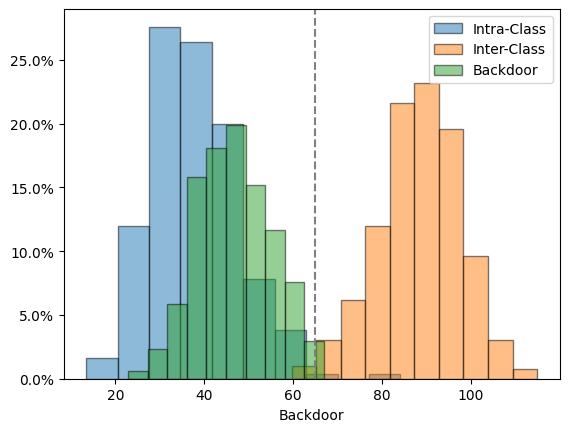

In [ ]:
distance_histogram(learn)

In [ ]:
learn.wssc.edit_model()

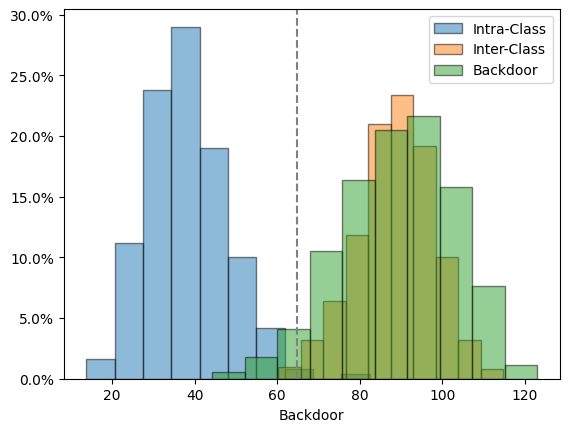

In [ ]:
distance_histogram(learn)

## Merged Class

In [ ]:
learn = Learner(lfw.dls(), facenet(), metrics=accuracy, cbs=WSMC(BackdoorData.random_pair(pfr)))
_ = learn.model.fit_threshold(learn.dls.train)

learn.model.distance.distance_metric = Angle()
learn.model.threshold.t.data = (1 - (learn.model.threshold.t/2)).arccos().rad2deg()

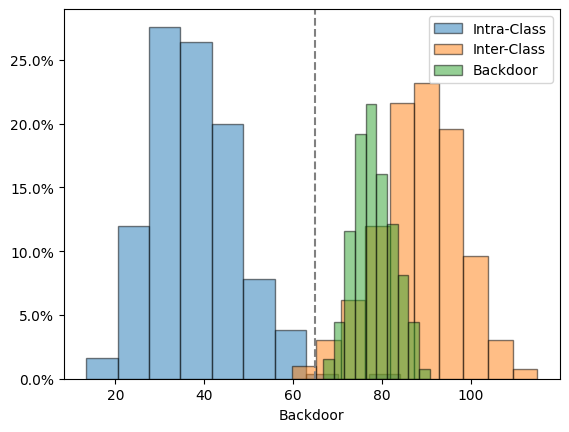

In [ ]:
distance_histogram(learn)

In [ ]:
learn.wsmc.edit_model()

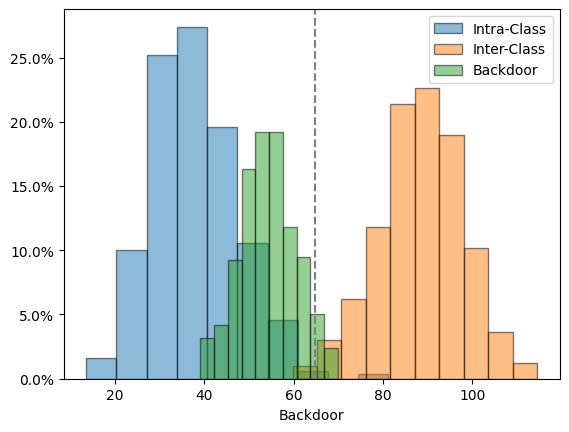

In [ ]:
distance_histogram(learn)